In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt



In [5]:
from uniform_attachment_model  import matrix_uniform_attachment

0.06040596961975098


In [109]:
from line_tree import create_line_tree_adjacency_matrix

In [110]:
matrix = create_line_tree_adjacency_matrix(1000)

In [ ]:

def find_barycenter_deterministic(adj_matrix):
    leaf_cut = []    
    adj_matrix_copy = copy.deepcopy(adj_matrix)
    
    n = len(adj_matrix_copy)  # Number of nodes, number of rows
    degrees = np.sum(adj_matrix_copy, axis=1)  # Sum of row = degree
    nodes = set(range(n))  # All vertices
    
    while len(nodes) > 2: 
        # Find all leaf nodes (nodes with degree 1)
        leaf_nodes = [i for i in nodes if degrees[i] == 1]  # Only those with a single 1 are leaves
        
        for leaf in leaf_nodes:
            nodes.remove(leaf)  # Remove the leaf
            degrees[leaf] = 0  # Degree is then 0

            for neighbor in range(n):  # Check all neighbors
                if adj_matrix_copy[leaf][neighbor] == 1:  # If there is a connection
                    degrees[neighbor] -= 1  # Decrement the degree of the neighbor
                    adj_matrix_copy[leaf][neighbor] = 0  # Change the 1 to 0
                    adj_matrix_copy[neighbor][leaf] = 0  # Also change its "transpose position" to 0
        leaf_cut.append(1)

    # At this point, there should only be 1 or 2 nodes left
    remaining_nodes = list(nodes)  # Convert the set to a list

    if len(remaining_nodes) == 1:  # If only 1 vertex remains
        return remaining_nodes, adj_matrix_copy, sum(leaf_cut)
    elif len(remaining_nodes) == 2:  # If 2 vertices remain
        return remaining_nodes, adj_matrix_copy, sum(leaf_cut)

In [50]:
def runner(iterations, node_size):
    
    node_counter = []
    edge_counter = []
    
    edge_count = 0
    vertex_count = 0
    for i in set(range(iterations)):
        matrix = matrix_uniform_attachment(node_size)
        sd ,ad, cuts = find_barycenter_deterministic(matrix)


        
        if len(sd) == 2:#it is an edge
            edge_count+=1
            edge_counter.append(sd[0])
            edge_counter.append(sd[1])
        elif len(sd) == 1: #is is an vertex
            vertex_count+=1
            node_counter.append(sd[0])
    return edge_count, vertex_count, node_counter, edge_counter

In [111]:
matrix = matrix_uniform_attachment(10)
sd ,ad = find_barycenter(matrix)

Barycenter is the edge that connects 1 and 4


In [52]:
len(sd)

1

In [101]:
edge_count, vertex_count, vertex_counter, edge_counter = runner(100000, 30)

Barycenter is the vertex 2
Barycenter is the vertex 1
Barycenter is the vertex 1
Barycenter is the vertex 2
Barycenter is the vertex 2
Barycenter is the edge that connects 2 and 8
Barycenter is the vertex 0
Barycenter is the vertex 0
Barycenter is the edge that connects 1 and 3
Barycenter is the edge that connects 0 and 1
Barycenter is the edge that connects 0 and 1
Barycenter is the vertex 5
Barycenter is the vertex 1
Barycenter is the vertex 1
Barycenter is the vertex 0
Barycenter is the edge that connects 0 and 1
Barycenter is the vertex 2
Barycenter is the vertex 1
Barycenter is the vertex 5
Barycenter is the vertex 0
Barycenter is the edge that connects 0 and 2
Barycenter is the vertex 1
Barycenter is the edge that connects 0 and 6
Barycenter is the edge that connects 0 and 8
Barycenter is the edge that connects 0 and 2
Barycenter is the edge that connects 2 and 3
Barycenter is the vertex 1
Barycenter is the edge that connects 5 and 7
Barycenter is the vertex 2
Barycenter is the e

In [86]:
edge_counter

[0,
 6,
 2,
 3,
 1,
 2,
 1,
 2,
 0,
 3,
 1,
 2,
 0,
 1,
 2,
 3,
 0,
 3,
 0,
 1,
 1,
 3,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 3,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 3,
 0,
 1,
 0,
 2,
 0,
 2,
 3,
 4,
 1,
 3,
 0,
 2,
 1,
 2,
 1,
 3,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 1,
 2,
 4,
 0,
 2,
 2,
 3,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 2,
 2,
 3,
 1,
 4,
 0,
 2,
 0,
 1,
 1,
 5,
 0,
 1,
 0,
 3,
 0,
 1,
 1,
 2,
 0,
 1]

In [87]:
vertex_counter

[0,
 3,
 4,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 0]

In [102]:
edge_count

49327

In [103]:
vertex_count

50673

In [90]:
vertex_int = set()
for i in vertex_counter:
    vertex_int.add(i)

vertex_int
    
    

{0, 1, 2, 3, 4}

In [91]:
total_dict = []
for v in vertex_int:
    occurence = (vertex_counter.count(v))
            
    dicr = {"interger": v,
           "occurence": occurence}
    total_dict.append(dicr)
            
            

In [92]:
total_dict

[{'interger': 0, 'occurence': 17},
 {'interger': 1, 'occurence': 16},
 {'interger': 2, 'occurence': 8},
 {'interger': 3, 'occurence': 1},
 {'interger': 4, 'occurence': 1}]

In [93]:
from matplotlib.pyplot import bar

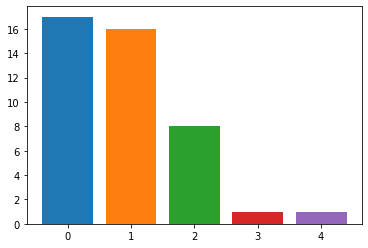

In [94]:
for i in total_dict:
    bar(x = [i['interger']], height=[i['occurence']])   

In [1]:
def runner(iterations, node_size):
    
    node_counter = []
    edge_counter = []
    
    edge_count = 0
    vertex_count = 0
    for i in set(range(iterations)):
        matrix = matrix_uniform_attachment(node_size)
        sd ,ad = find_barycenter(matrix)


        
        if len(sd) == 2:#it is an edge
            edge_count+=1
            edge_counter.append(sd[0])
            edge_counter.append(sd[1])
        elif len(sd) == 1: #is is an vertex
            vertex_count+=1
            node_counter.append(sd[0])
    return edge_count, vertex_count, node_counter, edge_counter

In [113]:
iterations = 100
nodes = 10

In [22]:
from tqdm.notebook import tqdm


final_list = []
iterations_list = [10, 100, 1000, 10000]
nodes_size = [10,25,50,100,300]

total_steps = len(iterations_list) * len(nodes_size)

progress_bar = tqdm(total=total_steps, desc="Computing",  dynamic_ncols=True)

for iteration_value in iterations_list:
    for nodes in nodes_size:
        difference_list = []
        for _ in range(100):  
            edge_count, vertex_count, vertex_counter, edge_counter = runner(iteration_value, nodes)
            difference_normalized = (edge_count - vertex_count) / iteration_value
            difference_list.append(difference_normalized)

        mean = np.mean(difference_list)
        std = np.std(difference_list)
        dict_for_each_comb = {
            'iteration': iteration_value,
            'vertex_count': nodes,
            'mean': mean,
            'deviation': std
        }

        final_list.append(dict_for_each_comb)
        
        progress_bar.update(1) 

progress_bar.close() 


Computing:   0%|                                         | 0/20 [00:00<?, ?it/s]

In [9]:
final_list

[{'iteration': 10,
  'vertex_count': 5,
  'mean': np.float64(0.23399999999999999),
  'deviation': np.float64(0.19810098434889212)},
 {'iteration': 10,
  'vertex_count': 10,
  'mean': np.float64(0.26),
  'deviation': np.float64(0.20880613017821098)},
 {'iteration': 10,
  'vertex_count': 20,
  'mean': np.float64(0.236),
  'deviation': np.float64(0.2047046653107838)},
 {'iteration': 10,
  'vertex_count': 30,
  'mean': np.float64(0.23600000000000002),
  'deviation': np.float64(0.1729277305697383)},
 {'iteration': 10,
  'vertex_count': 50,
  'mean': np.float64(0.226),
  'deviation': np.float64(0.2052413213755944)},
 {'iteration': 100,
  'vertex_count': 5,
  'mean': np.float64(0.1758),
  'deviation': np.float64(0.09352197602702801)},
 {'iteration': 100,
  'vertex_count': 10,
  'mean': np.float64(0.07919999999999999),
  'deviation': np.float64(0.06674848312883222)},
 {'iteration': 100,
  'vertex_count': 20,
  'mean': np.float64(0.07419999999999999),
  'deviation': np.float64(0.067307949010499

In [23]:
import pandas as pd
df = pd.DataFrame(final_list)
df.to_csv('heat_map_tree_larges_nodes.csv')